### How to do Multiple Linear Regression in Python | Jupyter Notebook | Sklearn

Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

The CCPP.zip dataset can be downloaded from <a href="https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant" title="UCI ML Repo">UCI ML Repo</a> link.

Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

- Ind variables: AT, V, AP, RH
- Dep variable: PE

### Import libs

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 16)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
plt.style.use('seaborn') # Configure plt to use seaborn plot style
plt.rcParams["figure.figsize"] = (20, 10) # Set the figure size for plotting Globally
sns.set(font_scale=1.1)  # Set the font size for all plots

### Import DS

In [2]:
data_df = pd.read_excel('Data\\CCPP\\Folds5x2_pp.xlsx')

In [3]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Define X and y

In [4]:
X = data_df.drop(['PE'], axis = 1).values     # Dep variables
y = data_df['PE'].values                      # Target

In [5]:
print(type(X))
print(type(y))

print()
print(X.ndim)
print(y.ndim)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

2
1


In [6]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [7]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Split the DS in training and test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Train the model on the training set

In [9]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

### Predict the test set results

In [10]:
y_pred = ml.predict(X_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [11]:
# Vaidate the model using a known row. 
## Here we used row 5. Actual value is 473.9.

ml.predict([[10.82, 37.50, 1009.23, 96.62]])

array([471.82520823])

In [12]:
# get the regression line using the model
regression_line = ml.predict(X)

### Evaluate the model

In [13]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)   # 93%. Close to 1 or 100% is best score.

0.9304112159477682

### Visualize the results

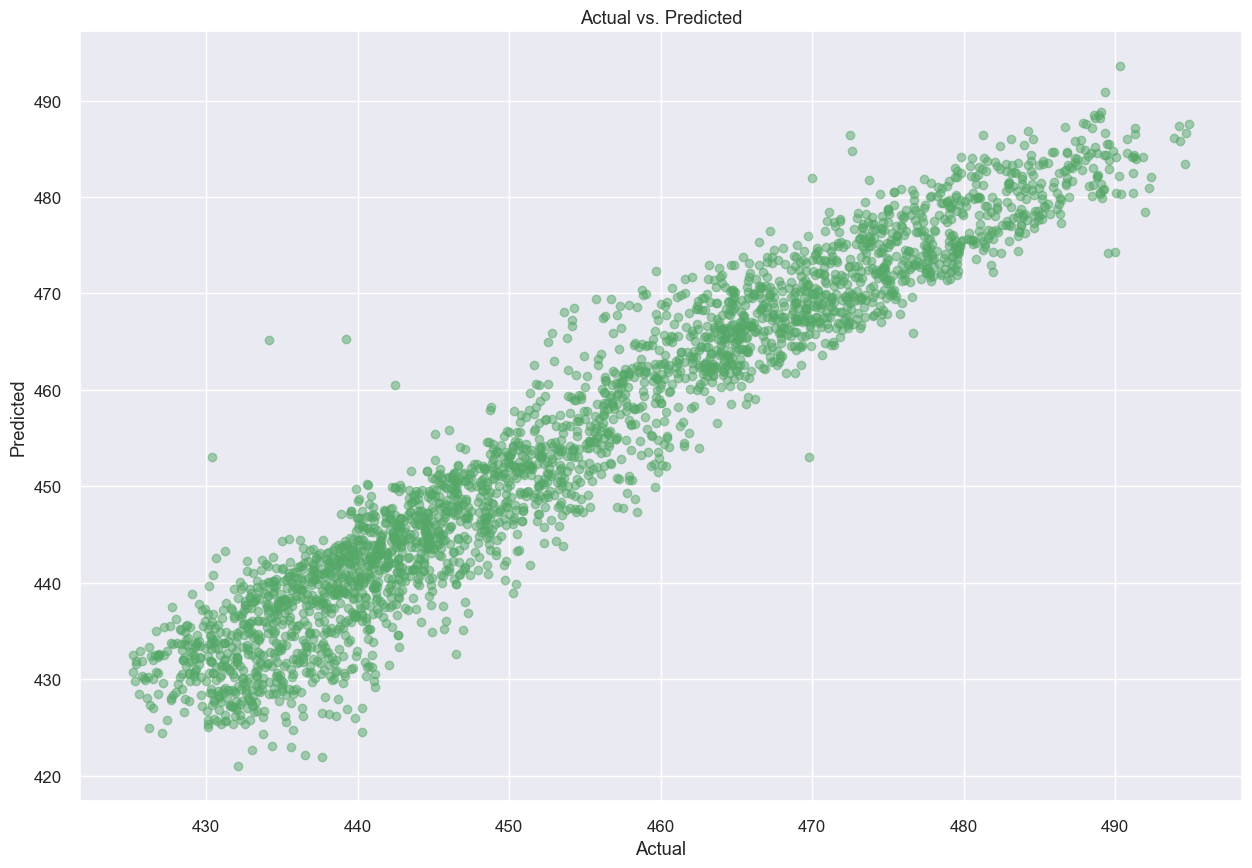

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize= (15, 10))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.scatter(y_test, y_pred, alpha = 0.5, c = 'g')


### plt.plot(X,regression_line,label='Best Fit Line', color='orange',linewidth=4)

# alpha shows a degree of overlapping
# color helps
## 1 scatterplot can have 1 color



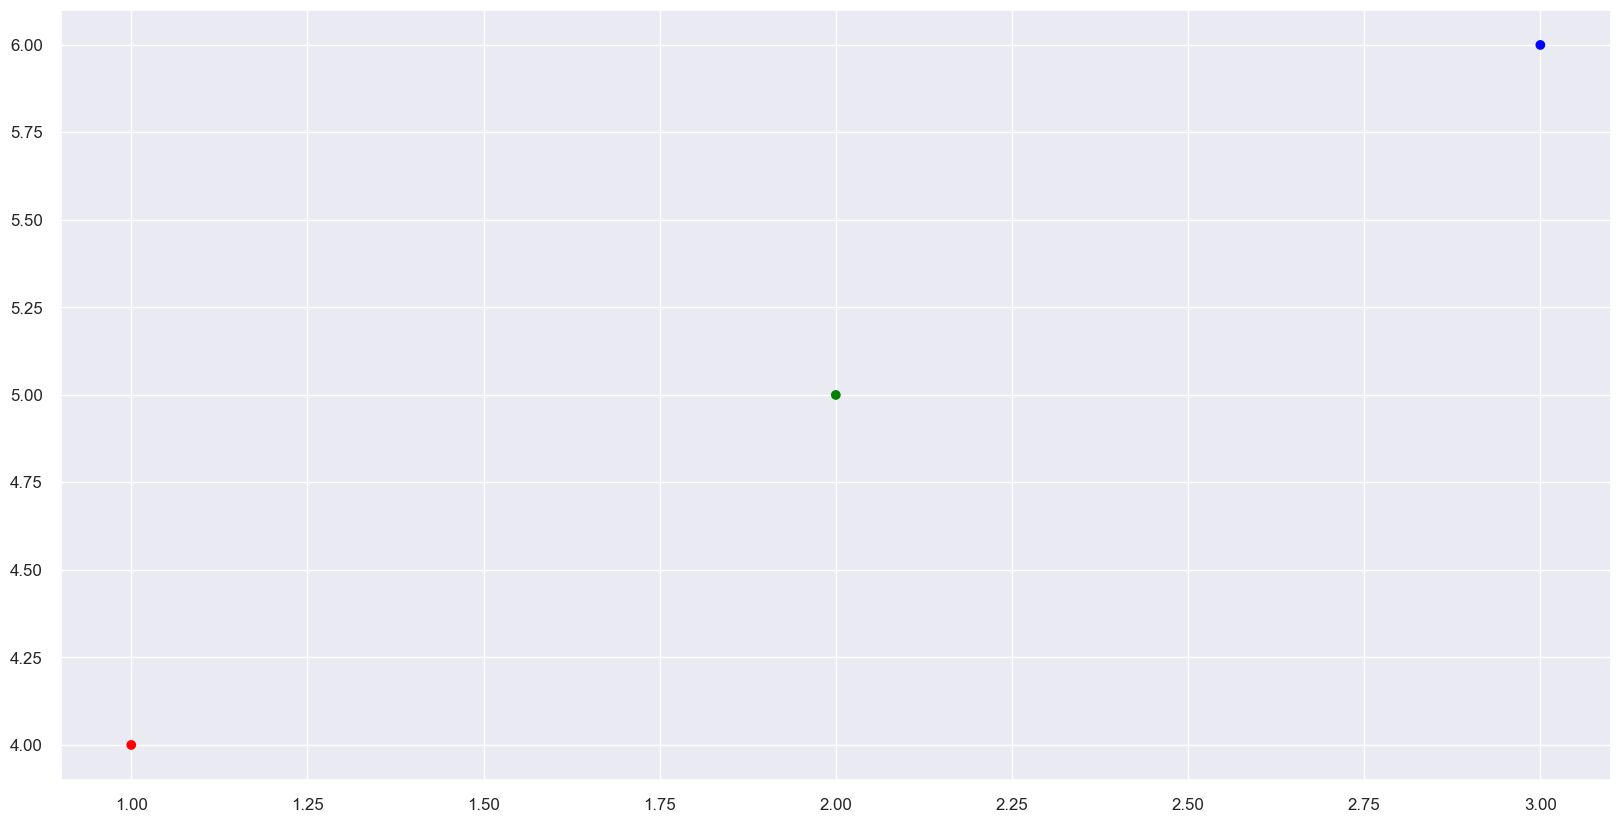

In [15]:
plt.scatter([1,2,3],[4,5,6],color=['red','green','blue'])  # this is allowed

### Predicted Vlaues

In [16]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df

,Actual Value,Predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
...,...,...,...
2866,475.86,472.027234,3.832766
2867,477.94,474.005522,3.934478
2868,426.86,432.473808,-5.613808
2869,433.40,436.164172,-2.764172


#### End of Case Study